In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import mols2grid
import rdkit.Chem.MolStandardize 
import openpyxl

In [2]:
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import mols2grid
import rdkit.Chem.MolStandardize 
from rdkit.Chem.MolStandardize import rdMolStandardize

## data_from_NIKAIDO (generating input for Maestro)

In [4]:
df = pd.read_excel('data_from_NIKAIDO.xlsx', sheet_name='β-lactams', skiprows=[0])

In [5]:
df_quinolones = pd.read_excel('data_from_NIKAIDO.xlsx', sheet_name='quinolones', skiprows=[0])

In [6]:
perm_coef = []
for x in df_quinolones['name'].tolist():
    if x in df['name'].tolist():
        string = df[df['name'] == x]
        Permeability_coefficient = int(string['Permeability coefficient'])
        perm_coef.append(Permeability_coefficient)
    else:
        perm_coef.append(np.nan)

df_quinolones.insert(4, 'Permeability coefficient', perm_coef, False)

C:\Users\olshana1\AppData\Local\Temp\ipykernel_76164\70977345.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Permeability_coefficient = int(string['Permeability coefficient'])


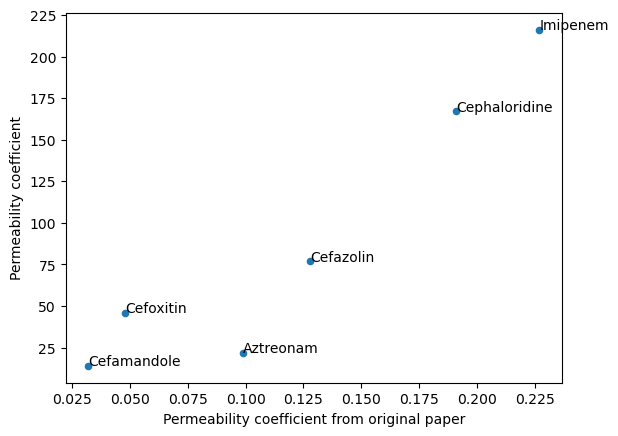

In [7]:
#create scatter plot of assists vs. points
ax = df_quinolones.plot(kind='scatter', x='Permeability coefficient from original paper', y = 'Permeability coefficient')

#label each point in scatter plot
for idx, row in df_quinolones.iterrows():
    ax.annotate(row['name'], (row['Permeability coefficient from original paper'], row['Permeability coefficient']))

In [8]:
df_quinolones_notnan = df_quinolones[df_quinolones['Permeability coefficient'].notnull()]
df_quinolones_isnan = df_quinolones[df_quinolones['Permeability coefficient'].isnull()]

In [9]:
#linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_quinolones_notnan['Permeability coefficient from original paper'].to_numpy().reshape(-1, 1), df_quinolones_notnan['Permeability coefficient'])

#prediction
predictions = lm.predict(df_quinolones_isnan['Permeability coefficient from original paper'].to_numpy().reshape(-1, 1))

#adding new values
df_quinolones_isnan_final = df_quinolones_isnan.copy()
df_quinolones_isnan_final.loc[:,('Permeability coefficient')] = predictions.tolist()

#final data
df = pd.concat([df, df_quinolones_isnan_final], ignore_index=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Canonical SMILES                              33 non-null     object 
 1   name                                          37 non-null     object 
 2   Permeability coefficient                      37 non-null     float64
 3   Charge                                        37 non-null     object 
 4   class                                         37 non-null     object 
 5   Permeability coefficient from original paper  3 non-null      float64
dtypes: float64(2), object(4)
memory usage: 1.9+ KB


## amino acids

In [11]:
df_amino_acids = pd.read_excel('data_from_NIKAIDO.xlsx', sheet_name='amino acids', skiprows=[0])
df_amino_acids

,Canonical SMILES,name,Permeability coefficient from original paper,Charge,class
0,C(C(=O)O)N,Glycine,100,n,Neutral compounds
1,O=C(CCC(C(O)=O)N)O,Glutamate,95,-,Monoanionic compounds
2,O=C(C(CCCNC(N)=N)N)O,Arginine,87,+ + -,Compounds with two positive and one negative c...
3,C[N+]1(CCCC1)CC2=C(N3C(C(C3=O)NC(C(C4=CSC(N)=N...,Cefepime,43,±,Zwitterionic compounds
4,CC(C)(C(O)=O)ON=C(C(NC1C2N(C(C(O)=O)=C(C[N+]3=...,Ceftazidime,20,+ - -,Compounds with one positive and two negative c...
5,CC1(C(N2C(S1)C(C2=O)NC(C(C3=CC=CC=C3)N)=O)C(O)...,Ampicillin,35,±,Zwitterionic compounds
6,CC1(C(N2C(S1)C(C2=O)NC(C(C3=CC=CC=C3)C(O)=O)=O...,Carbenicillin,19,- -,Dianionic compounds
7,CC(OCC1=C(N2C(C(C2=O)NC(C(C3=CSC(N)=N3)=NOC)=O...,Cefotaxime,10,-,Monoanionic compounds


In [12]:
perm_coef = []
for x in df_amino_acids['name'].tolist():
    if x in df['name'].tolist():
        string = df[df['name'] == x]
        Permeability_coefficient = int(string['Permeability coefficient'])
        perm_coef.append(Permeability_coefficient)
    else:
        perm_coef.append(np.nan)

df_amino_acids.insert(4, 'Permeability coefficient', perm_coef, False)

C:\Users\olshana1\AppData\Local\Temp\ipykernel_76164\4013916723.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Permeability_coefficient = int(string['Permeability coefficient'])


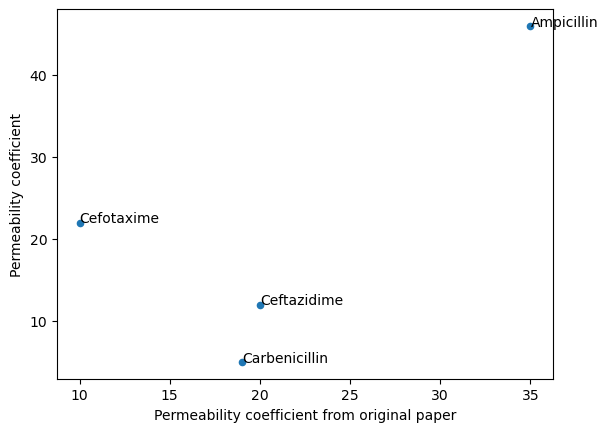

In [13]:
#create scatter plot of assists vs. points
ax = df_amino_acids.plot(kind='scatter', x='Permeability coefficient from original paper', y = 'Permeability coefficient')

#label each point in scatter plot
for idx, row in df_amino_acids.iterrows():
    ax.annotate(row['name'], (row['Permeability coefficient from original paper'], row['Permeability coefficient']))

In [14]:
df_amino_acids

,Canonical SMILES,name,Permeability coefficient from original paper,Charge,Permeability coefficient,class
0,C(C(=O)O)N,Glycine,100,n,NaN,Neutral compounds
1,O=C(CCC(C(O)=O)N)O,Glutamate,95,-,NaN,Monoanionic compounds
2,O=C(C(CCCNC(N)=N)N)O,Arginine,87,+ + -,NaN,Compounds with two positive and one negative c...
3,C[N+]1(CCCC1)CC2=C(N3C(C(C3=O)NC(C(C4=CSC(N)=N...,Cefepime,43,±,NaN,Zwitterionic compounds
4,CC(C)(C(O)=O)ON=C(C(NC1C2N(C(C(O)=O)=C(C[N+]3=...,Ceftazidime,20,+ - -,12.0,Compounds with one positive and two negative c...
5,CC1(C(N2C(S1)C(C2=O)NC(C(C3=CC=CC=C3)N)=O)C(O)...,Ampicillin,35,±,46.0,Zwitterionic compounds
6,CC1(C(N2C(S1)C(C2=O)NC(C(C3=CC=CC=C3)C(O)=O)=O...,Carbenicillin,19,- -,5.0,Dianionic compounds
7,CC(OCC1=C(N2C(C(C2=O)NC(C(C3=CSC(N)=N3)=NOC)=O...,Cefotaxime,10,-,22.0,Monoanionic compounds


In [16]:
df.to_csv(r'C:\Users\olshana1\Git\GramNeg-Accumulation\Gram Negative Permeation - OmpF/MIXED_DATASET_ALL_ANTIBIOTICS.csv', index=False, header=True)

In [17]:
df

,Canonical SMILES,name,Permeability coefficient,Charge,class,Permeability coefficient from original paper
0,CC(OCC1=C(N2C(C(C2=O)NC(CC#N)=O)SC1)C(O)=O)=O,Cefacetrile,100.000000,-,Monoanionic compounds,NaN
1,CC1=NN=C(S1)SCC2=C(N3C(C(C3=O)NC(CN4C=NN=N4)=O...,Cefazolin,77.000000,-,Monoanionic compounds,NaN
2,CN1C(SCC2=C(N3C(C(OC)(C3=O)NC(CSCC#N)=O)SC2)C(...,Cefmetazole,65.000000,-,Monoanionic compounds,NaN
3,NaN,S810592,63.000000,-,Monoanionic compounds,NaN
4,NaN,R02-5328A,52.000000,-,Monoanionic compounds,NaN
5,COC1(C2N(C1=O)C(C(O)=O)=C(CS2)COC(N)=O)NC(CC3=...,Cefoxitin,46.000000,-,Monoanionic compounds,NaN
6,NaN,LY151884,41.000000,-,Monoanionic compounds,NaN
7,CON=C(C1=CSC(N)=N1)C(NC2C3N(C2=O)C(C(O)=O)=CCS...,Ceftizoxime,35.000000,-,Monoanionic compounds,NaN
8,NaN,HR109,30.000000,-,Monoanionic compounds,NaN
9,CC(OCC1=C(N2C(C(C2=O)NC(C(C3=CSC(N)=N3)=NOC)=O...,Cefotaxime,22.000000,-,Monoanionic compounds,NaN


## Final data for docking

In [18]:
#cleaning nulls in SMILES
datatowork = df[(df['Canonical SMILES'].notnull())]

data_maestro = datatowork[['Canonical SMILES', 'name']]
data_maestro.to_csv('data_maestro.csv')

In [20]:
list_antibiotics = data_maestro['name'].tolist()
len(list_antibiotics)

33

## All antibiotic

In [18]:
name_antibiotic = 'SCE-20'
if name_antibiotic in list_antibiotics:
    print('This antibiotic is already exists in dataset')
    l = df[df['name'] == name_antibiotic]
else:
    print('This antibiotic does not exist in dataset')

This antibiotic does not exist in dataset


## Docking table

In [19]:
#reading initial data from maestro
dff = pd.read_csv('data_after_docking.csv', sep = ',')

In [20]:
#creating new data to work with
dff_new = dff.rename(columns={'Title': 'name'})

#cleaning empty columns 

columns = dff_new.columns
for x in columns:
    number_null = dff_new[x].isnull().sum()
    if number_null == dff_new.shape[0]:
        dff_new.drop(columns = [x], axis = 1, inplace=True)


#cleaning unnecesary columns 
dff_new.drop(columns = ['Entry ID', 'Entry Name', 'Date Added', 'Date Modified',
       'Source Path', 'Source File', 'Source File Index', 'Job Name', 'glide gridfile', 
       'source file', 'Force Field', 'flags', 'Chiralities Consistent','source file index', 
       'mmshare version', 'Variant', 'glide metal', 'glide eff state penalty', 'Energy', 'glide lignum', 'glide confnum', 'glide posenum'], axis = 1, inplace=True)

In [62]:
#ligand's numbers 

list_ligands = []
for x in dff_new.index.tolist():
    y = x+1
    list_ligands.append(y)
list_ligands

dff_new.insert(1, "Ligand", list_ligands, False)

## Interaction Fingerprints

The following interactions were analyzed: hydrogen bonds (HAccep, HDonor and Ar-Hbond), halogen bonds (XBond), salt-bridge interactions (Salt), π-cation interactions (PiCat), π-π interactions (PiFace, PiEdge) and hydrophobic interactions (HPhob)

In [63]:
int_table = pd.read_csv('docking_antibiotics_with_residues_2_pv_interactions.csv', sep = ',')

In [64]:
int_table

,Type,Ligand,Title,LigResidue,LigAtom,RecResidue,RecAtom,Dist
0,HAccep cc,1,Cephaloglycin,_:900(UNK),8( ),A:16(LYS),2753( HZ2),1.880
1,HAccep cn,1,Cephaloglycin,_:900(UNK),9( ),A:42(ARG),2924(HH22),1.718
2,HAccep nn,1,Cephaloglycin,_:900(UNK),25( ),A:132(ARG),3544(HH12),1.822
3,HAccep cn,1,Cephaloglycin,_:900(UNK),27( ),A:82(ARG),3199(HH22),1.980
4,HAccep cn,1,Cephaloglycin,_:900(UNK),28( ),A:16(LYS),2754( HZ3),2.081
...,...,...,...,...,...,...,...,...
5731,HPhob,622,BL-S217,_:900(UNK),7( ),A:124(TYR),949( CG ),4.212
5732,HPhob,622,BL-S217,_:900(UNK),7( ),A:124(TYR),950( CD1),3.442
5733,HPhob,622,BL-S217,_:900(UNK),7( ),A:124(TYR),952( CE1),3.854
5734,HPhob,622,BL-S217,_:900(UNK),13( ),A:121(ASP),928( CB ),3.826


In [65]:
interactions = int_table.rename(columns={'Title': 'name'})

interactions.drop(columns = ['LigResidue','LigAtom', 'RecAtom'], axis = 1, inplace=True)
interactions

,Type,Ligand,name,RecResidue,Dist
0,HAccep cc,1,Cephaloglycin,A:16(LYS),1.880
1,HAccep cn,1,Cephaloglycin,A:42(ARG),1.718
2,HAccep nn,1,Cephaloglycin,A:132(ARG),1.822
3,HAccep cn,1,Cephaloglycin,A:82(ARG),1.980
4,HAccep cn,1,Cephaloglycin,A:16(LYS),2.081
...,...,...,...,...,...
5731,HPhob,622,BL-S217,A:124(TYR),4.212
5732,HPhob,622,BL-S217,A:124(TYR),3.442
5733,HPhob,622,BL-S217,A:124(TYR),3.854
5734,HPhob,622,BL-S217,A:121(ASP),3.826


In [66]:
jkj = interactions['RecResidue'].unique().tolist()
len(jkj)

39

In [67]:
binds = interactions['Type'].unique().tolist()
binds

['HAccep cc',
 'HAccep cn',
 'HAccep nn',
 'HDonor nn',
 'HDonor nc',
 'HDonor cc',
 'HAccep nc',
 'HDonor cn',
 'XBond',
 'Salt',
 'PiCat',
 'PiFace',
 'PiEdge',
 'HPhob']

In [68]:
table_int = pd.pivot_table(interactions, values='Type', index=['name', 'Ligand'], columns=['RecResidue'], aggfunc = np.sum, fill_value=0)

In [69]:
interaction_residues = table_int.columns
interaction_residues

Index(['A:102(TYR)', 'A:106(TYR)', 'A:110(GLY)', 'A:113(ASP)', 'A:114(MET)',
       'A:115(LEU)', 'A:116(PRO)', 'A:117(GLU)', 'A:118(PHE)', 'A:119(GLY)',
       'A:120(GLY)', 'A:121(ASP)', 'A:123(ALA)', 'A:124(TYR)', 'A:125(SER)',
       'A:132(ARG)', 'A:14(TYR)', 'A:15(GLY)', 'A:16(LYS)', 'A:167(ARG)',
       'A:168(ARG)', 'A:20(LEU)', 'A:22(TYR)', 'A:300(THR)', 'A:302(TYR)',
       'A:310(TYR)', 'A:32(TYR)', 'A:337(VAL)', 'A:339(GLN)', 'A:340(PHE)',
       'A:38(MET)', 'A:40(TYR)', 'A:42(ARG)', 'A:46(LYS)', 'A:62(GLU)',
       'A:64(ASN)', 'A:66(GLN)', 'A:80(LYS)', 'A:82(ARG)'],
      dtype='object', name='RecResidue')

In [70]:
#interaction fingerpronts for each residue

for x in range(table_int.shape[0]):
    for y in range(table_int.shape[1]):
        cell = str(table_int.iloc[x, y])
        #print(cell)
        list_int = []
        for bond in binds:
            if bond in cell:
                #print('YES', bond)
                list_int.append("1")
            else:
                list_int.append("0")
        #print(list_int)
        table_int.iloc[x,y] =  " ".join(list_int)
        #table_int.iloc[x,y] = list_int

In [71]:
#format column names
table_int.columns = [''.join(str(s).strip() for s in col if s) for col in table_int.columns]

#reset index
table_int.reset_index(inplace=True)

In [72]:
residues = table_int.columns.tolist()

table_int['interaction_1Dstring'] = 0

for x in range(table_int.shape[0]):
    oneD_int = []
    for y in residues[2:]:
        cell_1 = table_int.loc[x,y]
        oneD_int.append(cell_1)
        
    table_int.loc[x, 'interaction_1Dstring'] = " ".join(oneD_int)
    #table_int.loc[x, 'interaction_1Dstring'] = oneD_int

In [73]:
FINAL = pd.merge(dff_new, table_int,  how='left', left_on=['name','Ligand'], right_on = ['name','Ligand'])

In [74]:
FINAL

,name,Ligand,glide rotatable bonds,docking score,glide ligand efficiency,glide ligand efficiency sa,glide ligand efficiency ln,glide gscore,glide lipo,glide hbond,...,A:38(MET),A:40(TYR),A:42(ARG),A:46(LYS),A:62(GLU),A:64(ASN),A:66(GLN),A:80(LYS),A:82(ARG),interaction_1Dstring
0,Cephaloglycin,1,8,-6.712,-0.240,-0.728,-1.549,-6.712,0.000,-1.260,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,Cephaloglycin,2,8,-6.625,-0.237,-0.718,-1.529,-6.625,0.000,-1.051,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 1 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 1 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,Cephalexin,3,5,-6.621,-0.276,-0.796,-1.585,-6.621,0.000,-1.055,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,Cephaloglycin,4,8,-6.565,-0.234,-0.712,-1.515,-6.565,0.000,-1.293,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 1 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4,Imipenem,5,7,-6.478,-0.324,-0.879,-1.621,-6.478,-0.149,-0.716,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 1,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 1 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 1 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Cephalothin,618,8,-1.991,-0.077,-0.227,-0.468,-1.991,0.000,-0.808,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,1 0 1 0 0 0 0 0 0 1 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
618,BL-S217,619,9,-1.864,-0.064,-0.197,-0.427,-1.864,-0.161,-0.829,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,1 0 0 0 0 0 1 0 0 1 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
619,BL-S217,620,9,-1.837,-0.063,-0.195,-0.421,-1.837,0.000,-0.399,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
620,BL-S217,621,9,-1.822,-0.063,-0.193,-0.417,-1.822,-0.022,-0.782,...,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,1 0 0 0 0 0 0 0 0 1 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0,0 1 0 0 0 0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [75]:
FINAL.to_csv(r'/Users/sashaolshanova/Git/New_project/Gram Negative Permeation - OmpF/FINAL.csv', index=False, header=True)

# Taking a pose based on interaction fingerprints 

## Voting based on majority of the interaction existence
#### FINAL_pose1 dataframe

In [76]:
#new dataframe 

new_col_t = table_int.columns.tolist()
new_col_t.remove('Ligand')
new_col_t.remove('interaction_1Dstring')

FINAL_pose1 = pd.DataFrame(columns=new_col_t)
FINAL_pose1['name'] = list_antibiotics


In [77]:
for antibiotic in list_antibiotics:
    for residue in new_col_t[1:]:

        #take antibiotic 
        test_ant = FINAL.loc[FINAL['name'] == antibiotic, [residue]]

        #take residue
        test_dat = pd.DataFrame(columns=list(range(1, len(binds)+1)))
        for bit_str in test_ant[residue]:
            test_dat.loc[len(test_dat)] = bit_str.split(' ')

        #voting
        ones_ziros = []
        for col in range(1, len(binds)+1):
            ones = 0
            for bit in test_dat.loc[:, col]:
                if bit == '1':
                    ones = ones + 1
            ones_ziros.append(ones)

        #generating new string 
        cut_off = test_dat.shape[0]/2

        list_bits_new = []
        for sum in ones_ziros:
            if sum > cut_off:
                list_bits_new.append("1")
            else:
                list_bits_new.append("0")
        
        gfg = " ".join(list_bits_new)

        FINAL_pose1.loc[FINAL_pose1['name'] == antibiotic, [residue]] = gfg
        #print(antibiotic, residue, gfg)


## Voting based on at least ONE interaction existence
#### FINAL_pose3 dataframe

In [78]:
FINAL_pose3 = pd.DataFrame(columns=new_col_t)
FINAL_pose3['name'] = list_antibiotics

In [79]:
for antibiotic in list_antibiotics:
    for residue in new_col_t[1:]:

        #take antibiotic 
        test_ant = FINAL.loc[FINAL['name'] == antibiotic, [residue]]

        #take residue
        test_dat = pd.DataFrame(columns=list(range(1, len(binds)+1)))
        for bit_str in test_ant[residue]:
            test_dat.loc[len(test_dat)] = bit_str.split(' ')

        #voting
        ones_ziros = []
        for col in range(1, len(binds)+1):
            ones = 0
            for bit in test_dat.loc[:, col]:
                if bit == '1':
                    ones = ones + 1
            ones_ziros.append(ones)

        list_bits_new = []
        for sum in ones_ziros:
            if sum > 0:
                list_bits_new.append("1")
            else:
                list_bits_new.append("0")
        
        gfg = " ".join(list_bits_new)

        FINAL_pose3.loc[FINAL_pose3['name'] == antibiotic, [residue]] = gfg
        #print(antibiotic, residue, gfg)


## Taking the low energy pose for each lingand
#### FINAL_pose2 dataframe

In [80]:
#empty DataFrame
FINAL_pose2 = pd.DataFrame(columns = FINAL.columns)

#adding pose with low energy
for x in list_antibiotics:
    x = FINAL[FINAL['name'] == x]
    min_glide_gscore= x['glide gscore'].min()
    l = x[x['glide gscore'] == min_glide_gscore]
    FINAL_pose2 = pd.concat([FINAL_pose2, l])

## Charge, Permeability coefficient, ASP113 for all experiments

In [81]:
list_experiments = [FINAL_pose1, FINAL_pose2, FINAL_pose3]
important_residues = ['A:113(ASP)', 'A:117(GLU)', 'A:16(LYS)', 'A:42(ARG)', 'A:82(ARG)', 'A:132(ARG)']

for experiment in list_experiments:

    list_charge = []
    list_Permeability_coefficient = []
    list_Canonical_SMILES = []

    for x in experiment['name']:
        string = df[df['name'] == x]
        charge = string['Charge'].values
        Permeability_coefficient = int(string['Permeability coefficient'])
        Canonical_SMILES = string['Canonical SMILES'].values
        
        list_charge.append(charge[0])
        list_Permeability_coefficient.append(Permeability_coefficient)
        list_Canonical_SMILES.append(Canonical_SMILES[0])

    experiment.insert(1, "Permeability coefficient", list_Permeability_coefficient, False)
    experiment.insert(2, "Charge", list_charge, False)
    experiment.insert(experiment.shape[1], "Canonical SMILES" , list_Canonical_SMILES, False)

    #all important bonds

    for residue in important_residues:
        bond = '_bond'
        experiment[residue + bond] = 0
        for p in experiment.index:
            string = experiment.loc[p, residue]
            a113_number = 0
            for y in string:
                if y == '1':
                    a113_number = a113_number + 1
                else:
                    a113_number = a113_number + 0
        
            if  a113_number > 0:
                experiment.loc[p, residue + bond] = "1"
            else:
                experiment.loc[p, residue + bond] = "0"

In [82]:
FINAL_pose1.to_csv(r'/Users/sashaolshanova/Git/New_project/Gram Negative Permeation - OmpF/FINAL_pose1.csv', index=False, header=True)
FINAL_pose2.to_csv(r'/Users/sashaolshanova/Git/New_project/Gram Negative Permeation - OmpF/FINAL_pose2.csv', index=False, header=True)
FINAL_pose3.to_csv(r'/Users/sashaolshanova/Git/New_project/Gram Negative Permeation - OmpF/FINAL_pose3.csv', index=False, header=True)

#### FINAL - dataframe with all poses
#### FINAL_pose1 - Taking a pose based on interaction fingerprints (based on the majority)
#### FINAL_pose2 - Taking the low energy pose for each lingand
#### FINAL_pose3 dataframe - Voting based on at least ONE interaction existence